<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [GRAD1] - Linear regression with gradient descent
<!-- DESC --> An example of gradient descent in the simple case of a linear regression.
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->


## Objectives :
 - To illustrate the iterative approach of a gradient descent

## What we're going to do :

Equation : $ Y = X.\Theta + N$  
Where N is a noise vector
and $\Theta = (a,b)$ a vector as y = a.x + b

We will calculate a loss function and its gradient.  
We will descend this gradient in order to find a minimum value of our loss function.

$
\triangledown_\theta MSE(\Theta)=\begin{bmatrix}
\frac{\partial}{\partial \theta_0}MSE(\Theta)\\
\frac{\partial}{\partial \theta_1}MSE(\Theta)\\
\vdots\\
\frac{\partial}{\partial \theta_n}MSE(\Theta)
\end{bmatrix}=\frac2m X^T\cdot(X\cdot\Theta-Y)
$  

and :  

$\Theta \leftarrow \Theta - \eta \cdot \triangledown_\theta MSE(\Theta)$

where $\eta$ is the learning rate

## Step 1 - Import and init


In [1]:
import numpy as np
import sys

sys.path.append('..')
import fidle.pwk as pwk

from modules.RegressionCooker import RegressionCooker 

# ---- Init Fidle stuffs
#
datasets_dir = pwk.init('GRAD1')

# ---- Instanciate a Regression Cooker
#
cooker = RegressionCooker(pwk)

**FIDLE 2020 - Practical Work Module**

Version              : 0.6.1 DEV
Notebook id          : GRAD1
Run time             : Wednesday 16 December 2020, 17:11:22
TensorFlow version   : 2.0.0
Keras version        : 2.2.4-tf
Datasets dir         : ~/datasets/fidle
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


<br>**FIDLE 2020 - Regression Cooker**

Version      : 0.1
Run time     : Wednesday 16 December 2020, 17:11:22


## Step 2 - Get a dataset

### Dataset :

X shape : (1000000, 1)  Y shape : (1000000, 1)  plot : 1000 points


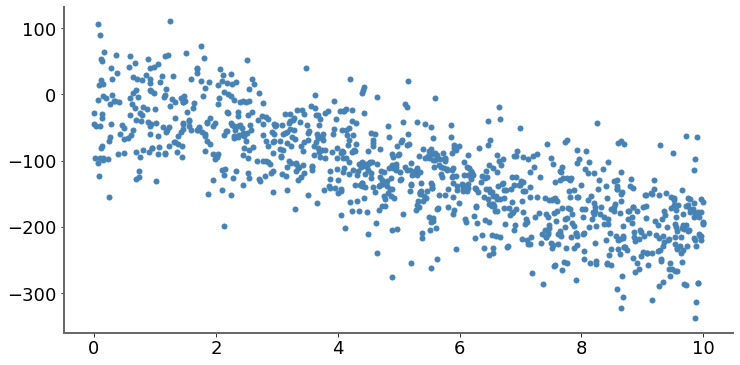

X                :      mean=   5.004  std=   2.886    min=   0.000    max=  10.000
Y                :      mean=-112.002  std=  77.303    min=-425.770    max= 188.861


In [2]:
X,Y = cooker.get_dataset(1000000)

cooker.plot_dataset(X,Y)

## Step 3 : Data normalization

In [3]:
X_norm     = ( X - X.mean() ) / X.std()
Y_norm     = ( Y - Y.mean() ) / Y.std()

cooker.vector_infos('X origine',X)
cooker.vector_infos('X normalized',X_norm)

X origine        :      mean=   5.004  std=   2.886    min=   0.000    max=  10.000
X normalized     :      mean=   0.000  std=   1.000    min=  -1.734    max=   1.732


## Step 4 - Basic descent

### Basic gradient descent :

**With :**  

with :
    epochs = 200
    eta    = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0  +17.475   -8.118  +1.568   -3.978  -0.016
   20   +8.002   -5.420  +1.047   -2.656  -0.271
   40   +3.780   -3.618  +0.699   -1.773  -0.442
   60   +1.899   -2.416  +0.467   -1.184  -0.555
   80   +1.060   -1.613  +0.311   -0.790  -0.631
  100   +0.686   -1.077  +0.208   -0.528  -0.682
  120   +0.519   -0.719  +0.139   -0.352  -0.716
  140   +0.445   -0.480  +0.093   -0.235  -0.739
  160   +0.412   -0.320  +0.062   -0.157  -0.754
  180   +0.397   -0.214  +0.041   -0.105  -0.764
  200   +0.391   -0.143  +0.028   -0.070  -0.770


<br>**Visualization :**

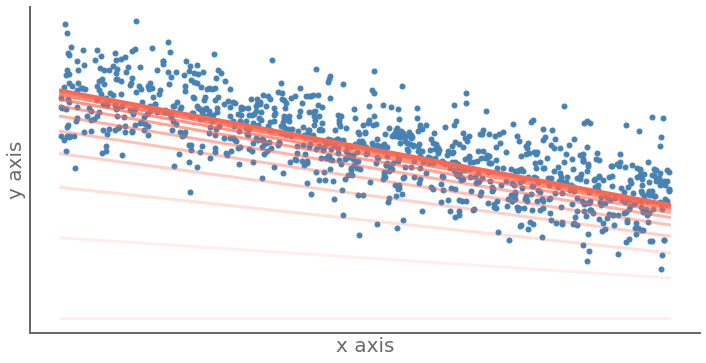

<br>**Loss :**

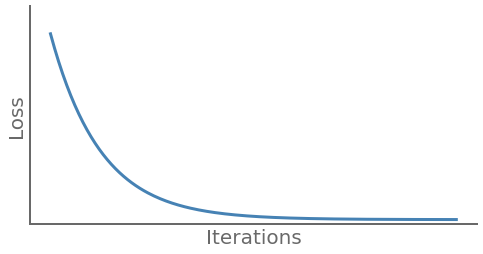

In [4]:
theta = cooker.basic_descent(X_norm, Y_norm, epochs=200, eta=0.01)

## Step 5 - Minibatch descent

### Mini batch gradient descent :

**With :**  

with :
    epochs     = 10
    batchs     = 20
    batch size = 10
    eta        = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0   +0.313   +3.019  +0.971   +0.071  -0.747
    1   +0.229   -4.993  +1.014   -0.033  -0.825
    2   +0.210   -0.911  +3.999   -0.022  -0.795
    3   +0.237   -1.041  -4.380   -0.022  -0.796
    4   +0.339   -1.175  +1.106   -0.002  -0.822
    5   +0.937   +3.404  -0.109   +0.011  -0.808
    6   +0.460   +5.775  -2.128   +0.025  -0.814
    7   +0.717  +10.079  +7.425   +0.004  -0.818
    8   +0.584   -6.748  -7.090   +0.005  -0.795
    9   +0.622   -1.218  -7.436   -0.001  -0.784


<br>**Visualization :**

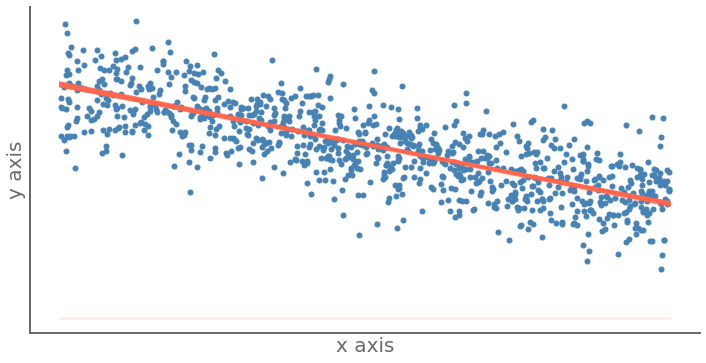

<br>**Loss :**

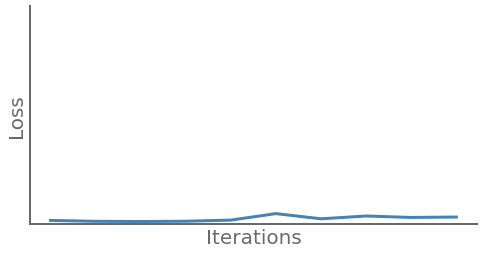

In [5]:
theta = cooker.minibatch_descent(X_norm, Y_norm, epochs=10, batchs=20, batch_size=10, eta=0.01)

In [6]:
pwk.end()

End time is : Wednesday 16 December 2020, 17:11:26
Duration is : 00:00:04 240ms
This notebook ends here


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>